# Datensets explorieren

**Inhalt:** Erste Schritte mit Pandas

**Nötige Skills:** Keine

**Lernziele:**
- Datensets herunterladen, Datensets öffnen
- Umfang der Daten, Felder und groben Inhalt erkennen
- Einfache deskriptive Statistiken
- Plotting Level 0

# Das Beispiel

Eine Datenbank zu den verhängten Todesstrafen und Exekutionen in den USA seit 1991

Quelle/Beschreibung: http://endofitsrope.com/data-and-documents/

Daten: http://endofitsrope.com/wp-content/uploads/2018/03/1991_2017_individualFIPS.csv-1991_2017_individualFIPS.csv

**Laden Sie das Datenfile herunter und speichern Sie es an einem geeigneten Ort**

(zum Beispiel in einem Unterordner `dataprojects/death-sentences`)

## Vorbereitung

Um die pandas library zu benutzen, müssen wir sie immer zuerst importieren

In [1]:
import pandas as pd

## Datenfile laden

Zuerst mal: Wo ist überhaupt die Datendatei, die wir gerade heruntergeladen haben?

**TIPP:** Tabulator-Taste während dem Tippen benutzen, um den Pfad auszulesen

In [2]:
path = "dataprojects/death-sentences/1991_2017_individualFIPS.csv-1991_2017_individualFIPS.csv"

Wir haben jetzt den Pfad zur Datei in der Variable `path` gespeichert

Jetzt wollen wir in die Datei hineinschauen. Was ein csv-File ist, wissen wir bereits: Eine Art Tabelle, bei der die einzelnen Spalten durch Kommas und die Zeilen durch Zeilenumbrüche getrennt sind. Schauen wir uns das nochmals kurz an:

In [3]:
with open(path) as f:
    dateiinhalt = f.read()

In [4]:
print(dateiinhalt)

defendant,year,sent_date,offns_date,fips_st,fips,state,county,prev_sent,def_race,def_gender,Executed,DateofExecution
"Petersen, Ryan",2017,,,1,69,AL,Houston,,W,M,,
"Jackson, Jamal",2017,,,1,97,AL,Mobile,,B,M,,
"Hunter Smith, Brad",2017,,,5,25,AR,Cleveland,,W,M,,
"Allen, Samantha",2017,,,4,13,AZ,Maricopa,,W,F,,
"Allen, John",2017,,,4,13,AZ,Maricopa,,W,M,,
"Champagne, Alan",2017,,,4,13,AZ,Maricopa,,O,M,,
"Strong, Preston",2017,,,4,27,AZ,Yuma,,B,M,,
"Washington, Darnell",2017,,,6,13,CA,Contra Costa,,B,M,,
"Meza, Heraclio",2017,,,6,37,CA,Los Angeles,,L,M,,
"Gordon, Steven",2017,,,6,59,CA,Orange,,W,M,,
"Rhoades, Cherie",2017,,,6,61,CA,bernan,,O,F,,
"Lopez, Elias",2017,,,6,65,CA,Riverside,,L,M,,
"Lopez, Johnny",2017,,,6,65,CA,Riverside,,L,M,,
"Contreras, David",2017,,,6,65,CA,Riverside,,L,M,,
"Hunter, Lorraine Allison",2017,,,6,65,CA,Riverside,,B,F,,
"Ellis, James",2017,,,6,71,CA,San Bernardino,,B,M,,
"Cheary, Christopher",2017,,,6,107,CA,Tulare,,W,M,,
"Roof, Dylann",2017,,,99,1,Federal,,,W,

Um mit diesen Daten arbeiten zu können, brauchen wir sie in nützlicher Form. Genau dafür ist pandas da.

Wir lesen das Datenfile also nochmals - diesmal mit der pandas Funktion `read_csv()`.

Pandas stellt das csv-File nun als Tabelle dar, mit Spaltentieln und einem Zeilen-Index.

Die oberste Zeile im csv-File wird standardmässig verwendet, um die Spaltentitel zu bilden.

In [5]:
pd.read_csv(path)

,defendant,year,sent_date,offns_date,fips_st,fips,state,county,prev_sent,def_race,def_gender,Executed,DateofExecution
0,"Petersen, Ryan",2017,NaN,NaN,1,69,AL,Houston,NaN,W,M,NaN,NaN
1,"Jackson, Jamal",2017,NaN,NaN,1,97,AL,Mobile,NaN,B,M,NaN,NaN
2,"Hunter Smith, Brad",2017,NaN,NaN,5,25,AR,Cleveland,NaN,W,M,NaN,NaN
3,"Allen, Samantha",2017,NaN,NaN,4,13,AZ,Maricopa,NaN,W,F,NaN,NaN
4,"Allen, John",2017,NaN,NaN,4,13,AZ,Maricopa,NaN,W,M,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4914,"Tam Minh, Le",2016,12/9/16,NaN,42,101,Pennsylvania,Philadelphia,NaN,A,M,NaN,NaN
4915,"Gonzalez, Mark",2016,1/28/16,NaN,48,29,Texas,Bexar,NaN,L,M,NaN,NaN
4916,"Brownlow, Charles",2016,5/23/16,NaN,48,257,Texas,Kaufman,NaN,B,M,NaN,NaN
4917,"Wells, Amos",2016,11/18/16,NaN,48,439,Texas,Tarrant,NaN,B,M,NaN,NaN


Was wir hier sehen, nennt sich in pandas-Sprache ***dataframe***. Dataframes sind die python-Version von Exceltabellen.

(Um es genau zu nehmen: wir sehen hier nicht das dataframe selbst, sondern eine Repräsentation davon)

Wir wollen das dataframe allerdings nicht nur sehen, sondern auch damit arbeiten.

Dazu müssen wir es in einer Variable speichern - der meistbenutzte Name dafür ist `df`.

(Man könnte aber auch irgendeinen anderen Variablennamen nehmen, zB `meinLiebstesDataframe`).

In [6]:
df = pd.read_csv(path)

## Datenstruktur überblicken

Der logische erste Schritt nach dem Einlesen eines Datenfile ist gewöhnlich, dass man sich einen Überblick über die Datenstruktur verschafft:
- Zeilenzahl
- Spaltenzahl
- Spaltennamen
- Datentypen
- etc.

Die allereinfachste Art, das zu tun, ist, sich das Datenfile einfach visuell darstellen zu lassen, indem man den Variablennamen eintippt und den Codeblock ausführt.

**Check:** Was sieht man in der Darstellung? Was sieht man nicht?

In [7]:
df

,defendant,year,sent_date,offns_date,fips_st,fips,state,county,prev_sent,def_race,def_gender,Executed,DateofExecution
0,"Petersen, Ryan",2017,NaN,NaN,1,69,AL,Houston,NaN,W,M,NaN,NaN
1,"Jackson, Jamal",2017,NaN,NaN,1,97,AL,Mobile,NaN,B,M,NaN,NaN
2,"Hunter Smith, Brad",2017,NaN,NaN,5,25,AR,Cleveland,NaN,W,M,NaN,NaN
3,"Allen, Samantha",2017,NaN,NaN,4,13,AZ,Maricopa,NaN,W,F,NaN,NaN
4,"Allen, John",2017,NaN,NaN,4,13,AZ,Maricopa,NaN,W,M,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4914,"Tam Minh, Le",2016,12/9/16,NaN,42,101,Pennsylvania,Philadelphia,NaN,A,M,NaN,NaN
4915,"Gonzalez, Mark",2016,1/28/16,NaN,48,29,Texas,Bexar,NaN,L,M,NaN,NaN
4916,"Brownlow, Charles",2016,5/23/16,NaN,48,257,Texas,Kaufman,NaN,B,M,NaN,NaN
4917,"Wells, Amos",2016,11/18/16,NaN,48,439,Texas,Tarrant,NaN,B,M,NaN,NaN


### Anfang und Schluss anzeigen

Manchmal möchte man in einem Notebook platzsparend arbeiten - das viele scrollen nervt.

Um Platz zu sparen: zeigen wir doch einfach nur die ersten drei Einträge an. Wir verwenden dazu die Funktion `head()`.

Jedes dataframe hat diese Funktion "eingebaut", wie auch noch viele weitere Funktionen, die wir in den nächsten Tagen kennenlernen werden.

In [8]:
df.head(3)

,defendant,year,sent_date,offns_date,fips_st,fips,state,county,prev_sent,def_race,def_gender,Executed,DateofExecution
0,"Petersen, Ryan",2017,NaN,NaN,1,69,AL,Houston,NaN,W,M,NaN,NaN
1,"Jackson, Jamal",2017,NaN,NaN,1,97,AL,Mobile,NaN,B,M,NaN,NaN
2,"Hunter Smith, Brad",2017,NaN,NaN,5,25,AR,Cleveland,NaN,W,M,NaN,NaN


Analog: die letzten drei Einträge. Mit `tail()`

In [9]:
df.tail(3)

,defendant,year,sent_date,offns_date,fips_st,fips,state,county,prev_sent,def_race,def_gender,Executed,DateofExecution
4916,"Brownlow, Charles",2016,5/23/16,NaN,48,257,Texas,Kaufman,NaN,B,M,NaN,NaN
4917,"Wells, Amos",2016,11/18/16,NaN,48,439,Texas,Tarrant,NaN,B,M,NaN,NaN
4918,"Bluntson, Demond",2016,5/10/16,NaN,48,479,Texas,Webb,NaN,B,M,NaN,NaN


In [10]:
#head() funktioniert auch ohne Angabe der Zeilenzahl...


**Tipp:** Wenn ihr nicht wisst, wie eine Funktion benutzen: Einfach ein Fragezeichen tippen: `?`

In [11]:
df.head

<bound method NDFrame.head of                defendant  year sent_date offns_date  fips_st  fips  \
0         Petersen, Ryan  2017       NaN        NaN        1    69   
1         Jackson, Jamal  2017       NaN        NaN        1    97   
2     Hunter Smith, Brad  2017       NaN        NaN        5    25   
3        Allen, Samantha  2017       NaN        NaN        4    13   
4            Allen, John  2017       NaN        NaN        4    13   
...                  ...   ...       ...        ...      ...   ...   
4914        Tam Minh, Le  2016   12/9/16        NaN       42   101   
4915      Gonzalez, Mark  2016   1/28/16        NaN       48    29   
4916   Brownlow, Charles  2016   5/23/16        NaN       48   257   
4917         Wells, Amos  2016  11/18/16        NaN       48   439   
4918    Bluntson, Demond  2016   5/10/16        NaN       48   479   

             state        county prev_sent def_race def_gender Executed  \
0               AL       Houston       NaN        W   

**Frage:** Was ist das für eine Art von Output, den wir hier erhalten haben?

Wir können den Output separat speichern, um damit weiter zu arbeiten.

In [12]:
erste_drei = df.head(3)

In [13]:
erste_drei

,defendant,year,sent_date,offns_date,fips_st,fips,state,county,prev_sent,def_race,def_gender,Executed,DateofExecution
0,"Petersen, Ryan",2017,NaN,NaN,1,69,AL,Houston,NaN,W,M,NaN,NaN
1,"Jackson, Jamal",2017,NaN,NaN,1,97,AL,Mobile,NaN,B,M,NaN,NaN
2,"Hunter Smith, Brad",2017,NaN,NaN,5,25,AR,Cleveland,NaN,W,M,NaN,NaN


**Quiz:** Erstellen Sie ein Dataframe, das ausschliesslich den dritt- und den zweitletzten Eintrag im dataframe `df` beinhaltet!

In [14]:
#Antwort: 
letzte_drei = df.tail(3)

In [15]:
zweit_und_drittletze = letzte_drei.head(2)

In [16]:
zweit_und_drittletze

,defendant,year,sent_date,offns_date,fips_st,fips,state,county,prev_sent,def_race,def_gender,Executed,DateofExecution
4916,"Brownlow, Charles",2016,5/23/16,NaN,48,257,Texas,Kaufman,NaN,B,M,NaN,NaN
4917,"Wells, Amos",2016,11/18/16,NaN,48,439,Texas,Tarrant,NaN,B,M,NaN,NaN


### Chained notation

Aktion ausführen, Output abspeichern, Aktion mit dem Output ausführen, Output erneut abspeichern ...

... um diesen Prozess etwas abzukürzen, gibt es vielen Programmiersprachen die sog. "chained notation".

So auch in Pandas. Wir können mehrere Aktionen in einer einzigen Kommandozeile ausführen, sie "verketten".

In [17]:
#das obige Beispiel funktioniert dann so:
df.tail(3).head(2)

,defendant,year,sent_date,offns_date,fips_st,fips,state,county,prev_sent,def_race,def_gender,Executed,DateofExecution
4916,"Brownlow, Charles",2016,5/23/16,NaN,48,257,Texas,Kaufman,NaN,B,M,NaN,NaN
4917,"Wells, Amos",2016,11/18/16,NaN,48,439,Texas,Tarrant,NaN,B,M,NaN,NaN


Mit der chained notation kann man beliebig viele pandas-Befehle aneinanderreihen – so lange der Output eines befehls ein Objekt ist (dataframe, series), das wiederum standardmässig mit einer Reihe von Funktionen "ausgerüstet" ist.

**Frage:** Warum funktioniert der folgende Befehl nicht?

In [18]:
#print(df).head(3)

### Ein paar Übersichtsfunktionen und -properties

An dieser Stelle wollen wir die Grösse und Struktur der Tabelle erforschen, ohne die Tabelle selbst anzuzeigen.

Pandas stellt dazu ein paar Befehle zur Verfügung.

- `shape` zeigt die Zeilen- und Spaltenzahl des dataframes als tuple an

In [19]:
df.shape

(4919, 13)

- `len()`: Falls wir nur an der Zeilenzahl interessiert sind, geht das auch über einen normalen Python-Befehl

In [20]:
len(df)

4919

- `columns` spuckt eine Liste der Spalten aus

In [21]:
df.columns

Index(['defendant', 'year', 'sent_date', 'offns_date', 'fips_st', 'fips',
       'state', 'county', 'prev_sent', 'def_race', 'def_gender', 'Executed',
       'DateofExecution'],
      dtype='object')

- `dtypes` spuckt eine Liste der Spalten samt dem Datentyp aus

In [22]:
df.dtypes

defendant          object
year                int64
sent_date          object
offns_date         object
fips_st             int64
fips                int64
state              object
county             object
prev_sent          object
def_race           object
def_gender         object
Executed           object
DateofExecution    object
dtype: object

Die Übersicht der `dtypes` zeigt uns rasch einiger wertvolle Informationen an:
- welche Spalten beinhalten Zahlenwerte (`int64` oder auch `float64`)
- welche Spalten beinhalten einen Text, der nicht als Zahl erkannt werden kann (`object`)

`dtypes` verrät auch schnell, falls es irgendwo Probleme und Unsauberkeiten in den Daten geben könnte. Das kann später wichtig werden.

Falls zB die Spalte "year" nicht als Zahl erkannt wird, stehen vermutlich irgendwo Buchstaben drin. Gewisse Funktionen über diese Spalte könnten deshalb fehlerhaft ausgeführt werden, weil der Datentyp nicht richtig erkannt wurde.

### Einfache deskriptive Statistiken - Teil 1

- `describe()` spuckt ein paar deskriptive Statistiken zu allen numerischen Spalten aus

In [23]:
df.describe()

,year,fips_st,fips
count,4919.000000,4919.000000,4919.000000
mean,1999.973572,26.026428,94.189266
std,6.755333,18.647075,99.697414
min,1991.000000,1.000000,1.000000
25%,1994.000000,6.000000,31.000000
50%,1998.000000,24.000000,71.000000
75%,2005.000000,42.000000,113.000000
max,2017.000000,99.000000,840.000000


Schauen wir uns diesen Output einen Moment an.

**year** scheint klar. Aber was zur Hölle sind **"fips_st"** und **"fips"** für Datenfelder? Weil die Dokumentation oben fehlt, wissen wir das für den Moment leider nicht.

Googeln führt uns:
- hierhin https://www.google.com/search?q=fips+code&ie=utf-8&oe=utf-8&client=firefox-b-ab
- und hierhin https://en.wikipedia.org/wiki/FIPS_county_code

Es handelt sich also um County Codes. Einen Durchschnitt darüber auszurechnen wäre offensichtlich ziemlich sinnlos. Etwa so sinnlos, wie zu berechnen: Was ist die durchschnittliche Postleitzahl eines Mörders in der Schweiz?

Bleiben wir also mal bei den Jahren. Das "durchschnittliche Jahr, in dem eine Exekution stattfand" auzurechnen, ist zwar auch nicht viel sinnvoller, aber immerhin: pandas hat eine separate Funktion dafür.

- `mean()` berechnet den Durchschnitt einer Datenreihe

In [24]:
df['year'].mean()

1999.9735718642

Etwas sinnvoller sind das Minimum und das Maximum - zeigen Beginn und Ende der Datensammlung an:

- `max()` und `min()` zeigen die Extremwerte an

In [25]:
df['year'].min()

1991

In [26]:
df['year'].max()

2017

Die totale Anzahl der Jahres-Einträge ist in diesem Fall gleichbedeutend mit der Anzahl Einträge im ganzen dataframe, weil jeder Eintrag vollständig ist.

- `count()` gibt die Anzahl der Einträge an

In [27]:
df['year'].count()

4919

Dann gibt's noch Dinge wie den Median und die Standardabweichung, obwohl das in diesem Fall wie gesagt ziemlich sinnlose Zahlen sind:

- `median()`und `std()` 

In [28]:
df['year'].median()

1998.0

In [29]:
df['year'].std()

6.755332632797359

### Einzelne Spalten anschauen

Moment mal, was war denn das soeben für eine Syntax mit den eckigen Klammern?

Einzelne Spalten werden bei pandas als ***series*** bezeichnet.

Es gibt verschiedene Arten, solche series bzw Spalten anzusprechen.

In [30]:
# Mit einer eckigen Klammer
df['year']

0       2017
1       2017
2       2017
3       2017
4       2017
        ... 
4914    2016
4915    2016
4916    2016
4917    2016
4918    2016
Name: year, Length: 4919, dtype: int64

In [31]:
# Einfach so nach dem Punkt
df.year

0       2017
1       2017
2       2017
3       2017
4       2017
        ... 
4914    2016
4915    2016
4916    2016
4917    2016
4918    2016
Name: year, Length: 4919, dtype: int64

Welche Syntax wählen? Darauf gibt es mehrere Antworten:
- Kommt drauf an, was man genau tun will und wie schreibfaul man ist
- Um auf Nummer sicher zu gehen, die eckigen Klammern verwenden

Um die Notation mit den eckigen Klammern noch besser zu verstehen, schaut euch mal diese zwei Zeilen Code an:

In [32]:
spalte = 'year'

In [33]:
df[spalte]

0       2017
1       2017
2       2017
3       2017
4       2017
        ... 
4914    2016
4915    2016
4916    2016
4917    2016
4918    2016
Name: year, Length: 4919, dtype: int64

In [34]:
# Alles klar?
...

Übrigens, manche Befehle wie `head()` funktionieren auch mit Serien. Am besten einfach ausprobieren - falls ein Befehl mit dataframes funktioniert aber mit series nicht, gibt es dann halt eine Fehlermeldung.

In [35]:
df['year'].head(3)

0    2017
1    2017
2    2017
Name: year, dtype: int64

### Einfache desktiptive Statistiken - Teil 2

Viele journalistische Fragestellungen ergeben sich, indem man einfach einmal zählt, wie oft gewisse Dinge in einem Datenset vorkommen: gewisse Namen, Geschlechter, Länder, whatever! Es ist (verlgichen mit Regressionsanalysen und sonstigen Methoden, die man an der Uni gelernt hat) etwa die simpelste und stupideste Auswertungsmethode.

Aber: Sie ist extrem gut vermittelbar, jeder Leser begreift sie, und sie fördert verblüffend oft Ansätze für Geschichten zutage.

Merkt euch dazu diese Funktion: `value_counts()`! Die Funktion spuckt aus, welches Element wie oft in einer Serie vorkommt.

(Wie gesagt - sieht trivial aus. Den Nutzen dieser Funktion hab ich am meisten unterschätzt, als ich sie zum ersten Mal gesehen habe.)

**Beispiel**: Anzahl der Todesurteile nach Jahren.

Man sieht auf den ersten Blick, dass die Anzahl der Todesurteile über die Jahre hinweg abgenommen hat.

In [36]:
df['year'].value_counts()

1994    344
1995    344
1996    321
1993    308
1998    300
1991    295
1992    290
1999    287
1997    283
2000    230
2001    174
2002    168
2003    153
2005    148
2004    147
2007    144
2006    132
2008    130
2010    127
2009    126
2012     89
2011     87
2013     86
2014     79
2015     56
2017     39
2016     32
Name: year, dtype: int64

**Quiz:** Um welchen Datentyp handelt es sich bei diesem Output?

In [37]:
#Antwort: 
type(df['year'].value_counts())

pandas.core.series.Series

**Quiz:** Zeigen Sie die Anzahl der Todesurteile nach Jahr, aber nur für die letzten zehn Jahre

In [38]:
#Antwort:
df['year'].value_counts().tail(10)

2008    130
2010    127
2009    126
2012     89
2011     87
2013     86
2014     79
2015     56
2017     39
2016     32
Name: year, dtype: int64

**Quiz:** Welche zehn US-Bundesstaaten haben am meisten Personen zu Tode verurteilt?

In [39]:
#Antwort:
df['state'].value_counts().head(10)

California        657
Texas             646
Florida           622
North Carolina    307
Alabama           296
Pennsylvania      251
Ohio              244
Arizona           197
Oklahoma          186
Illinois          141
Name: state, dtype: int64

**Quiz:** Und welche zehn US-Bundesstaaten haben am wenigsten Personen zu Tode verurteilt?

In [40]:
#Antwort
df['state'].value_counts().tail(10)

PA               2
OH               1
Wyoming          1
AR               1
MS               1
ID               1
OKlahoma         1
MO               1
New Hampshire    1
NE               1
Name: state, dtype: int64

... oops. Was für ein Staat ist "OKlahoma"? Und was ist "ID"?

Sieht aus, als wurden diese Daten nicht richtig geputzt!!

(ein häufiges Problem, das wir später noch genau anschaun werden).

Für den Moment, einfach mal diesen Code hier ausführen:

In [41]:
states = {
    'CA': 'California',
    'AR': 'Arkansas',
    'NV': 'Nevada',
    'TX': 'Texas',
    'AZ': 'Arizona',
    'FL': 'Florida',
    'OK': 'Oklahoma',
    'AL': 'Alabama',
    'PA': 'Pennsylvania',
    'OH': 'Ohio',
    'MS': 'Missouri',
    'MO': 'Montana',
    'ID': 'Idaho',
    'NE': 'Nebraska',
    'OKlahoma': 'Oklahoma'
}
df['state'].replace(states, inplace=True)

... und nochmals probieren:

In [42]:
df['state'].value_counts().tail(10)

Nebraska         15
South Dakota      9
Colorado          9
New Mexico        7
New York          7
Utah              6
U.S. Military     4
Montana           4
Wyoming           1
New Hampshire     1
Name: state, dtype: int64

Aaaaah, viel besser!

**Quiz:** Basierend auf dieser Liste: Wie viele Todesurteile haben die Staaten im Durchschnitt ausgesprochen

In [43]:
#Antwort
df['state'].value_counts().mean()

122.975

**Quiz:** Wie viele der 50 US-Bundesstaaten haben zwischen 1994 und 2017 überhaupt Todesurteile ausgesprochen?

In [44]:
#Antwort
df['state'].value_counts().count()

40

In [45]:
#oder auch:
len(df['state'].unique())

40

**Quiz**: Wie heissen die drei Personen, die am öftesten zum Tode verurteilt wurden?

In [46]:
#Antwort
df['defendant'].value_counts().head(3)

Wuornos, Aileen        5
Bolin, Oscar           4
McFadden , Vincent     4
Name: defendant, dtype: int64

In [47]:
# Hier evtl Zeit für eine Pause...

### Minimal komplexere deskriptive Statistiken

Bis jetzt ging es immer darum, einzelne Spalten auszuwerten. Nun machen wir uns daran, zwei Spalten in Kombination auszuwerten. Auch dafür hält pandas einige Funktionen bereit.

Die wichtigste: `groupby()` - ziemlich praktisch anzuwenden, wenn man mal die Syntax durchschaut.

**Beispiel:** Wann wurden in welchem Staat letztmals Menschen zum Tode verurteilt?

In [48]:
df.groupby('state')['year'].max()

state
Alabama           2017
Arizona           2017
Arkansas          2017
California        2017
Colorado          2010
Connecticut       2014
Delaware          2015
Federal           2017
Florida           2017
Georgia           2014
Idaho             2017
Illinois          2010
Indiana           2014
Kansas            2016
Kentucky          2014
Louisiana         2015
Maryland          2007
Mississippi       2015
Missouri          2017
Montana           2017
Nebraska          2017
Nevada            2017
New Hampshire     2008
New Jersey        2004
New Mexico        2000
New York          2002
North Carolina    2016
Ohio              2017
Oklahoma          2017
Oregon            2016
Pennsylvania      2017
South Carolina    2014
South Dakota      2014
Tennessee         2015
Texas             2017
U.S. Military     2013
Utah              1999
Virginia          2011
Washington        2013
Wyoming           2004
Name: year, dtype: int64

Was passiert hier genau?

- zunächst geben wir pandas einfach mal in einer funktion das oberste Gruppierungslevel durch. In diesem Fall sind wir an einer Auswertung nach Staaten interessiert. Als Output kriegt man vorerst - nichts, ausser einem merkwürdigen Objekt.

In [49]:
df.groupby('state')

- Mit diesem Objekt können wir nun weiter arbeiten. Dazu müssen wir allerdings angeben, welche Spalte uns als nächstes interessiert. In diesem Fall ist es: das Jahr eines Todesurteils. Wir erhalten - schon wieder ein Objekt.

In [50]:
df.groupby('state')['year']

- Warum? Weil wir pandas noch nicht gesagt haben, welche Metrik es auf die zweite Spalte anwenden soll. Zum Beispiel, den Durchschnitt, die Summe, .... In diesem Fall sind wir am Maximum interessiert. Und voilà, hier kommt unsere Auswertung.

In [51]:
df.groupby('state')['year'].max()

state
Alabama           2017
Arizona           2017
Arkansas          2017
California        2017
Colorado          2010
Connecticut       2014
Delaware          2015
Federal           2017
Florida           2017
Georgia           2014
Idaho             2017
Illinois          2010
Indiana           2014
Kansas            2016
Kentucky          2014
Louisiana         2015
Maryland          2007
Mississippi       2015
Missouri          2017
Montana           2017
Nebraska          2017
Nevada            2017
New Hampshire     2008
New Jersey        2004
New Mexico        2000
New York          2002
North Carolina    2016
Ohio              2017
Oklahoma          2017
Oregon            2016
Pennsylvania      2017
South Carolina    2014
South Dakota      2014
Tennessee         2015
Texas             2017
U.S. Military     2013
Utah              1999
Virginia          2011
Washington        2013
Wyoming           2004
Name: year, dtype: int64

**Quiz:** Um welchen Datentyp handelt es sich bei diesem Output?

In [52]:
#Antwort:
type(df.groupby('state')['year'].max())

pandas.core.series.Series

### Und zum Schluss...

... lasst uns das Resultat noch etwas ordnen. Sieht dann viel übersichtlicher aus.

- Wir benutzen dazu die Funktion `sort_values()`

In [53]:
df.groupby('state')['year'].max().sort_values()

state
Utah              1999
New Mexico        2000
New York          2002
Wyoming           2004
New Jersey        2004
Maryland          2007
New Hampshire     2008
Colorado          2010
Illinois          2010
Virginia          2011
U.S. Military     2013
Washington        2013
Connecticut       2014
Georgia           2014
Indiana           2014
Kentucky          2014
South Carolina    2014
South Dakota      2014
Tennessee         2015
Louisiana         2015
Mississippi       2015
Delaware          2015
Kansas            2016
North Carolina    2016
Oregon            2016
Pennsylvania      2017
Texas             2017
Oklahoma          2017
Alabama           2017
Nevada            2017
Nebraska          2017
Missouri          2017
Idaho             2017
Florida           2017
Federal           2017
California        2017
Arkansas          2017
Arizona           2017
Ohio              2017
Montana           2017
Name: year, dtype: int64

**Quiz:** Wie viele Frauen und wie viele Männer wurden insgesamt zum Tode verurteilt?

In [54]:
#Antwort
df['def_gender'].value_counts()

M       4800
F         92
W         11
B          4
Male       1
Name: def_gender, dtype: int64

**Quiz:** Bei vielen Frauenn und bei wie vielen Männer wurde das Todesurteil vollstreckt?

In [55]:
#Antwort
df.groupby('def_gender')['Executed'].count()

def_gender
B         1
F         6
M       623
Male      0
W         7
Name: Executed, dtype: int64

Offensichtlich wurden die Variablen auch hier niht immer ganz sauber codiert... wir machen auch hier einen Quick Fix:

In [56]:
gender_miscodes = {
    'B': 'M',
    'Male': 'M',
    'W': 'F'
}
df['def_gender'].replace(gender_miscodes, inplace=True)

## Plotting Level 1

Pandas hat eine eingebaute Plot-Funktion, die ziemlich einfach zu bedienen ist. Sie heisst...

- `plot()` (wie überraschend!)

Probieren wir dies gleich mal an unserer Auswertung der Todesurteile nach Jahr aus, die wir weiter oben gemacht haben:

In [57]:
df['year'].value_counts()

1994    344
1995    344
1996    321
1993    308
1998    300
1991    295
1992    290
1999    287
1997    283
2000    230
2001    174
2002    168
2003    153
2005    148
2004    147
2007    144
2006    132
2008    130
2010    127
2009    126
2012     89
2011     87
2013     86
2014     79
2015     56
2017     39
2016     32
Name: year, dtype: int64

In [58]:
df['year'].value_counts().plot()

`plot()` erstellt ohne weitere Anweisungen nur ein plot-Objekt. Um dieses standardmässig anzuzeigen, braucht es einen Befehl, den wir einmal pro Notebook ausführen lassen müssen:

In [59]:
%matplotlib inline

`plot()` funktioniert in den meisten Fällen ganz gut. Ausser hier, sieht es etwas scheisse aus:

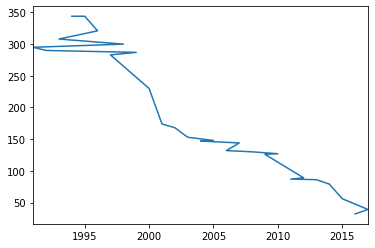

In [60]:
df['year'].value_counts().plot()

Der Grund liegt in diesem Fall darin, dass die Zeitreihe nicht ganz richtig geordnet war. Wir behelfen uns mit `sort_index()`.

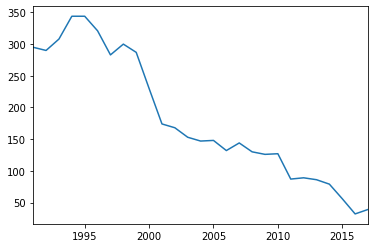

In [61]:
df['year'].value_counts().sort_index().plot()

Wir können auch einen Barchart anzeigen lassen:

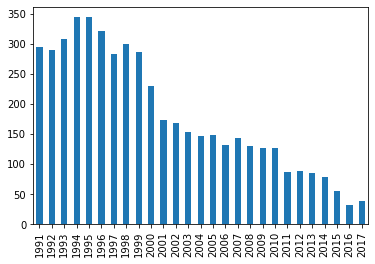

In [62]:
df['year'].value_counts().sort_index().plot(kind='bar')

Oder als horizontalen Barchart:

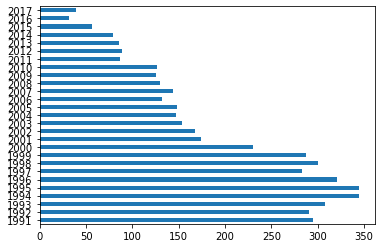

In [63]:
df['year'].value_counts().sort_index().plot(kind='barh')

Oder auch grösser:

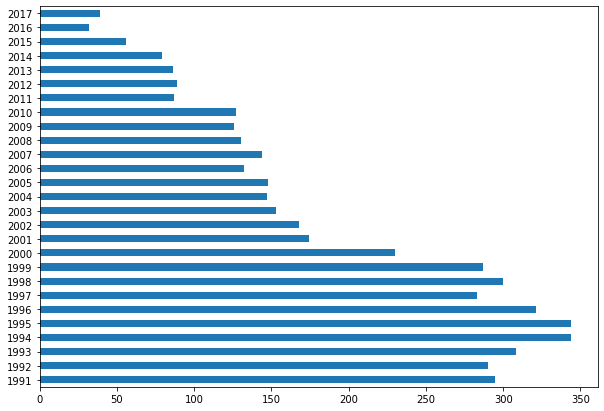

In [64]:
df['year'].value_counts().sort_index().plot(kind='barh', figsize=(10,7))

Damit sind wir am Ende des dieses Workbooks angelangt. Überlegen Sie sich nochmals kurz selbst: Was waren die wichtigsten Befehle, die wir kennengelernt haben? In welchem Stadium einer Recherche würde man diese Befehle typischerweise benutzen?

# Fragen, zum selbst bearbeiten

### Counties

**Quiz:** In welchen zehn Bezirken (Counties) wurden am meisten Todesurteile gefällt? Erstellen Sie erst eine Liste und plotten Sie danach das Ergebnis.

In [65]:
#Antwort Liste
df['county'].value_counts().head(10)

Los Angeles     205
Harris          179
Maricopa        121
Philadelphia    106
Jefferson       103
Riverside        95
Clark            91
Orange           91
Duval            72
Oklahoma         70
Name: county, dtype: int64

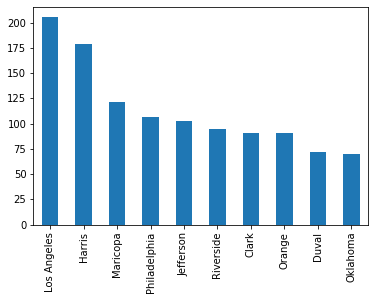

In [66]:
#Plot
df['county'].value_counts().head(10).plot(kind='bar')

### Frauen

**Quiz:** In welchen fünf Staaten wurden am meisten Frauen zum Tode verurteilt? Erstellen Sie eine Liste und einen Plot.

In [67]:
#Antwort Liste
df.groupby('def_gender')['state'].value_counts().head(5)

def_gender  state         
F           California        18
            Florida           15
            Texas             12
            North Carolina     8
            Virginia           8
Name: state, dtype: int64

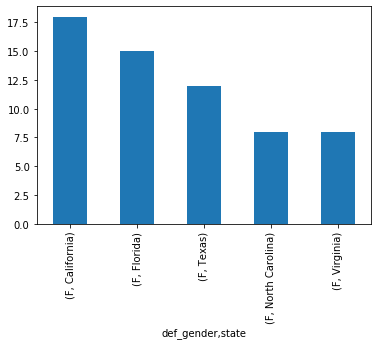

In [68]:
#Plot
df.groupby('def_gender')['state'].value_counts().head(5).plot(kind='bar')

### Vollstreckungen

**Quiz:** In welchen acht Staaten wurden am meisten Todesurteile vollstreckt? Liste und Barchart.

Hint: Benutzen Sie das Fragezeichen (`?`), um die Sortieroptionen von `sort_values()` anzuzeigen.

In [69]:
#Antwort Liste
df.groupby('Executed')['state'].value_counts()

Executed  state         
Executed  Texas             280
          Oklahoma           64
          Virginia           63
          Missouri           35
          North Carolina     28
          Ohio               28
          Florida            25
          South Carolina     19
          Georgia            17
          Mississippi        15
          Alabama            14
          Delaware           12
          Arizona             8
          Arkansas            5
          Nevada              5
          Indiana             4
          Louisiana           3
          South Dakota        3
          Washington          3
          Maryland            2
          Oregon              2
          Kentucky            1
          New Mexico          1
Name: state, dtype: int64

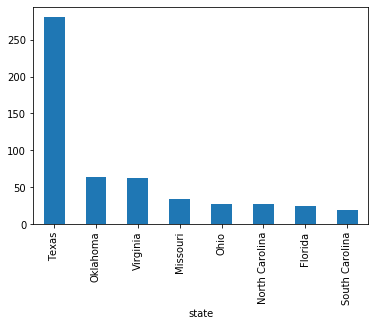

In [70]:
#Plot
df.groupby('state')['Executed'].count().sort_values(ascending=False).head(8).plot(kind='bar')

**Quiz:** Wie hat sich die Zahl der Exekutionen Jahr für Jahr entwickelt? Liste und Linechart.

In [71]:
#Antwort Liste
df.groupby('Executed')['year'].value_counts().sort_index()

Executed  year
Executed  1991    55
          1992    51
          1993    66
          1994    81
          1995    70
          1996    44
          1997    43
          1998    51
          1999    43
          2000    34
          2001    17
          2002    32
          2003    17
          2004    15
          2005     1
          2006     2
          2007     3
          2008     3
          2009     1
          2010     2
          2011     2
          2012     1
          2013     1
          2015     2
Name: year, dtype: int64

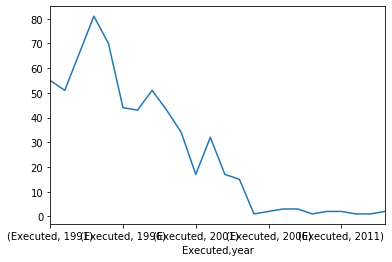

In [72]:
#Plot
df.groupby('Executed')['year'].value_counts().sort_index().plot()